In this notebook I will try to create a composite map from our canny arrays

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import cv2
import datetime
import xarray as xr
import os

%matplotlib inline

#### Importação dos dados de Atlantic-Iberian Biscay Irish- Ocean Physics Reanalysis

Através da command line eu importei uma base de dados relativa a 2019 dos valores de SST de um dado programa do Copernicus. Trata-se de um ficheiro .nc (netCDF)

No entanto no futuro eu vou querer que o meu programa faça download diretamente dos dados num python script

In [4]:
current_path = os.getcwd()
current_path

'/home/luisfigueiredo/JUNO/notebooks'

In [5]:
from pathlib import Path

data_folder = os.path.join(current_path,"../data")
data_folder

'/home/luisfigueiredo/JUNO/notebooks/../data'

In [6]:
nc_path = os.path.join(data_folder, "IBI-2019.nc")
ds = nc.Dataset(nc_path)
data = xr.load_dataset(nc_path)

In [7]:
print(ds)     # informações relativas ao ficheiro netCDF

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    source: CMEMS IBI-MFC
    institution: Puertos del Estado (PdE) - Mercator-Ocean (MO)
    references: http://marine.copernicus.eu
    title: CMEMS IBI REANALYSIS: DAILY PHYSICAL PRODUCTS 
    easting: longitude
    northing: latitude
    domain_name: IBI12
    FROM_ORIGINAL_FILE__field_type: mean
    field_date: 20191224
    FROM_ORIGINAL_FILE__longitude_min: -19.f
    FROM_ORIGINAL_FILE__longitude_max: 5.f
    FROM_ORIGINAL_FILE__latitude_min: 26.f
    FROM_ORIGINAL_FILE__latitude_max: 56.f
    z_min: 0.50576f
    z_max: 5698.061f
    contact: mailto: servicedesk.cmems@mercator-ocean.eu
    bulletin_date: 2020-12-01
    bulletin_type: Reanalysis
    _CoordSysBuilder: ucar.nc2.dataset.conv.CF1Convention
    comment: 
    history: Data extracted from dataset http://localhost:8080/thredds/dodsC/cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m
    dimensions(sizes): time(358)

In [8]:
#Converter o ficheiro netCDF para uma dataframe
datadf = data.to_dataframe()
datadf2 = datadf.reset_index()

In [9]:
datadf2 = datadf2.drop(['depth'], axis=1)     #dropar coluna 'depth' (não é necessária pq é sempre igual)
datadf2    #os dados .nc estão agora no formato de uma dataframe

,latitude,longitude,time,thetao
0,35.0,-19.0,2019-01-01 12:00:00,17.766001
1,35.0,-19.0,2019-01-02 12:00:00,17.969000
2,35.0,-19.0,2019-01-03 12:00:00,18.152000
3,35.0,-19.0,2019-01-04 12:00:00,18.254002
4,35.0,-19.0,2019-01-05 12:00:00,18.211000
...,...,...,...,...
7320737,45.0,-5.0,2019-12-20 12:00:00,13.619000
7320738,45.0,-5.0,2019-12-21 12:00:00,13.559000
7320739,45.0,-5.0,2019-12-22 12:00:00,13.458000
7320740,45.0,-5.0,2019-12-23 12:00:00,13.400000


In [10]:
datadf2 = datadf2[['time', 'latitude', 'longitude', 'thetao']]    #reorganizar as colunas da dataframe
datadf2

,time,latitude,longitude,thetao
0,2019-01-01 12:00:00,35.0,-19.0,17.766001
1,2019-01-02 12:00:00,35.0,-19.0,17.969000
2,2019-01-03 12:00:00,35.0,-19.0,18.152000
3,2019-01-04 12:00:00,35.0,-19.0,18.254002
4,2019-01-05 12:00:00,35.0,-19.0,18.211000
...,...,...,...,...
7320737,2019-12-20 12:00:00,45.0,-5.0,13.619000
7320738,2019-12-21 12:00:00,45.0,-5.0,13.559000
7320739,2019-12-22 12:00:00,45.0,-5.0,13.458000
7320740,2019-12-23 12:00:00,45.0,-5.0,13.400000


In [ ]:
#### Começar por tentar fazer um composite map com 2 imagens (canny arrays)

In [11]:
#Df com dados relativos a um dia específico (neste caso 25 Setembro)
dia25 = datadf2[datadf2['time'] == '2019-09-25 12:00:00']
dia25

,time,latitude,longitude,thetao
267,2019-09-25 12:00:00,35.0,-19.000000,22.527000
625,2019-09-25 12:00:00,35.0,-18.916666,22.516001
983,2019-09-25 12:00:00,35.0,-18.833334,22.648001
1341,2019-09-25 12:00:00,35.0,-18.750000,22.809002
1699,2019-09-25 12:00:00,35.0,-18.666666,22.910000
...,...,...,...,...
7319219,2019-09-25 12:00:00,45.0,-5.333334,19.063999
7319577,2019-09-25 12:00:00,45.0,-5.250000,19.021999
7319935,2019-09-25 12:00:00,45.0,-5.166667,18.996000
7320293,2019-09-25 12:00:00,45.0,-5.083334,19.000999


In [12]:
#Df com dados relativos a um dia específico (neste caso 25 Setembro)
dia26 = datadf2[datadf2['time'] == '2019-09-26 12:00:00']
dia26

,time,latitude,longitude,thetao
268,2019-09-26 12:00:00,35.0,-19.000000,22.477001
626,2019-09-26 12:00:00,35.0,-18.916666,22.535000
984,2019-09-26 12:00:00,35.0,-18.833334,22.711000
1342,2019-09-26 12:00:00,35.0,-18.750000,22.859001
1700,2019-09-26 12:00:00,35.0,-18.666666,22.924999
...,...,...,...,...
7319220,2019-09-26 12:00:00,45.0,-5.333334,18.885000
7319578,2019-09-26 12:00:00,45.0,-5.250000,18.834999
7319936,2019-09-26 12:00:00,45.0,-5.166667,18.810001
7320294,2019-09-26 12:00:00,45.0,-5.083334,18.831001


In [13]:
def canny_creation(df, Tmax):
    
    """
    Função que pega numa df com temperaturas relativas a um certo dia e retorna a matriz obtida através do Canny
    """
    
    #Pegar na df dum dia e converte-la num np array com os valores de Temperatura para os valores de long e lati
    Temp = df.pivot_table(index='longitude', columns='latitude', values='thetao').T.values
    
    #Converter os valores de temperatura no formato uint8 com valores entre 0-255
    Temp_day = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')

    Temp_day = np.flipud(Temp_day)   #flipud -> Reverse the order of elements along axis 0 (up/down).
    
    #apply the canny algorithm and plot the image with the edges
    canny = cv2.Canny(Temp_day, Tmax/2, Tmax, L2gradient=False, apertureSize=3)
    
    return canny

In [14]:
canny_25 = canny_creation(dia25, 180)
canny_25

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
canny_26 = canny_creation(dia26, 180)
canny_26.shape

(121, 169)

In [16]:
fp = np.zeros((121,169)).astype('uint8')
fp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
fp = fp + canny_25 + canny_26

In [18]:
fp.max()

255

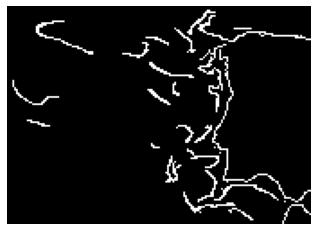

In [19]:
plt.imshow(fp, 'gray')    #'gray'-> parametro para por a preto e branco
plt.axis('off');

A fazer: 
    criar uma função que me divida a dataframe original conforme os dias e depois lhe aplique a função canny_creation para que eu depois consiga construir a matriz de probability front

#### Código para Dividir a dataframe consoante a data

In [20]:
datadf2

,time,latitude,longitude,thetao
0,2019-01-01 12:00:00,35.0,-19.0,17.766001
1,2019-01-02 12:00:00,35.0,-19.0,17.969000
2,2019-01-03 12:00:00,35.0,-19.0,18.152000
3,2019-01-04 12:00:00,35.0,-19.0,18.254002
4,2019-01-05 12:00:00,35.0,-19.0,18.211000
...,...,...,...,...
7320737,2019-12-20 12:00:00,45.0,-5.0,13.619000
7320738,2019-12-21 12:00:00,45.0,-5.0,13.559000
7320739,2019-12-22 12:00:00,45.0,-5.0,13.458000
7320740,2019-12-23 12:00:00,45.0,-5.0,13.400000


In [21]:
df5 = datadf2.copy()

In [22]:
UniqueName2 = [pd.Timestamp(dd).strftime("%Y-%m-%d %H:%M:%S") for dd in df5['time'].unique()]

In [23]:
UniqueName2 = np.array(UniqueName2, dtype=np.object)

In [24]:
UniqueName2

array(['2019-01-01 12:00:00', '2019-01-02 12:00:00',
       '2019-01-03 12:00:00', '2019-01-04 12:00:00',
       '2019-01-05 12:00:00', '2019-01-06 12:00:00',
       '2019-01-07 12:00:00', '2019-01-08 12:00:00',
       '2019-01-09 12:00:00', '2019-01-10 12:00:00',
       '2019-01-11 12:00:00', '2019-01-12 12:00:00',
       '2019-01-13 12:00:00', '2019-01-14 12:00:00',
       '2019-01-15 12:00:00', '2019-01-16 12:00:00',
       '2019-01-17 12:00:00', '2019-01-18 12:00:00',
       '2019-01-19 12:00:00', '2019-01-20 12:00:00',
       '2019-01-21 12:00:00', '2019-01-22 12:00:00',
       '2019-01-23 12:00:00', '2019-01-24 12:00:00',
       '2019-01-25 12:00:00', '2019-01-26 12:00:00',
       '2019-01-27 12:00:00', '2019-01-28 12:00:00',
       '2019-01-29 12:00:00', '2019-01-30 12:00:00',
       '2019-01-31 12:00:00', '2019-02-01 12:00:00',
       '2019-02-02 12:00:00', '2019-02-03 12:00:00',
       '2019-02-04 12:00:00', '2019-02-05 12:00:00',
       '2019-02-06 12:00:00', '2019-02-07 12:0

In [25]:
#create a data frame dictionary to store your data frames
df = {elem : pd.DataFrame for elem in UniqueName2}

for key in df.keys():
    df[key] = df5[:][df5['time'] == key]

In [26]:
summer = UniqueName2[(UniqueName2>'2019-06-21 12:00:00') & (UniqueName2 <= '2019-09-23 12:00:00')]
summer

array(['2019-06-22 12:00:00', '2019-06-23 12:00:00',
       '2019-06-24 12:00:00', '2019-06-25 12:00:00',
       '2019-06-26 12:00:00', '2019-06-27 12:00:00',
       '2019-06-28 12:00:00', '2019-06-29 12:00:00',
       '2019-06-30 12:00:00', '2019-07-01 12:00:00',
       '2019-07-02 12:00:00', '2019-07-03 12:00:00',
       '2019-07-04 12:00:00', '2019-07-05 12:00:00',
       '2019-07-06 12:00:00', '2019-07-07 12:00:00',
       '2019-07-08 12:00:00', '2019-07-09 12:00:00',
       '2019-07-10 12:00:00', '2019-07-11 12:00:00',
       '2019-07-12 12:00:00', '2019-07-13 12:00:00',
       '2019-07-14 12:00:00', '2019-07-15 12:00:00',
       '2019-07-16 12:00:00', '2019-07-17 12:00:00',
       '2019-07-18 12:00:00', '2019-07-19 12:00:00',
       '2019-07-20 12:00:00', '2019-07-21 12:00:00',
       '2019-07-22 12:00:00', '2019-07-23 12:00:00',
       '2019-07-24 12:00:00', '2019-07-25 12:00:00',
       '2019-07-26 12:00:00', '2019-07-27 12:00:00',
       '2019-07-28 12:00:00', '2019-07-29 12:0

In [149]:
len(summer)

94

In [27]:
#Crio um array canny com as dimensões (121, 169) apenas com zeros. 
#Depois para cada dia aplico a função canny_creation e somo esses valores ao array canny

canny = np.zeros((121,169))
for days in summer:
    canny = canny + canny_creation(df[days], 180)

In [28]:
# tenho de dividir por este valor pois Setembro tem 30 dias e o máximo valor do canny é 255 (intensidade do pixel)
canny = canny/(94*255) 

In [29]:
canny.max()

1.0

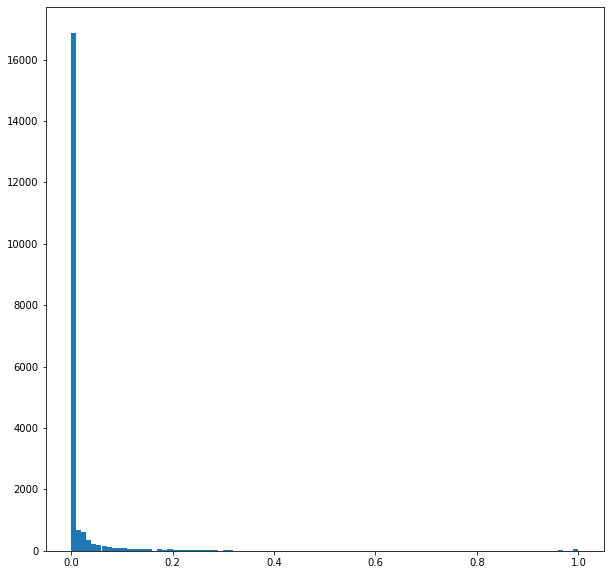

In [34]:
plt.hist(canny.flatten(), bins=100);
plt.rcParams["figure.figsize"] = 10, 10

No handles with labels found to put in legend.


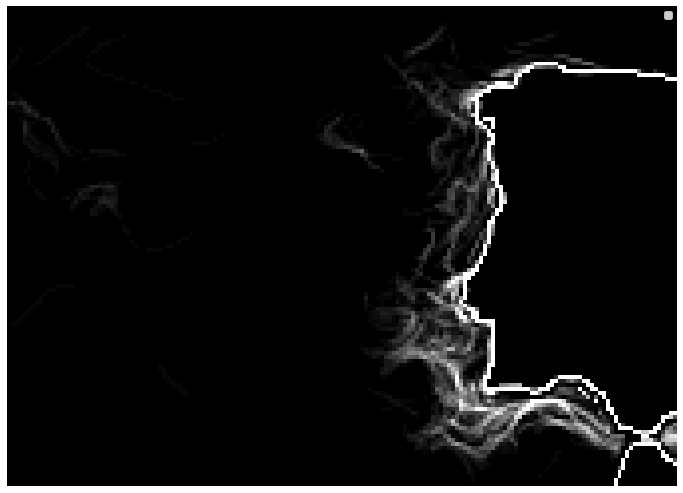

In [39]:
plt.rcParams["figure.figsize"] = 12,12
plt.imshow(canny, 'gray', vmax=0.4, vmin=0.01)    #'gray'-> parametro para por a preto e branco
plt.axis('off');
plt.legend()

In [45]:
cannyf = canny.flatten()

In [47]:
np.mean(cannyf[cannyf<0.8])

0.014778645219237706

In [51]:
canny2 = canny[canny>0.8] = 0

#### saca uma das matrizes so com a costa (sem frente) e subtrai essa matriz à das frentes

In [156]:
costa = datadf2[datadf2['time'] == '2019-09-25 12:00:00']
costa = costa.drop(['time'], axis=1)
costa

,latitude,longitude,thetao
267,35.0,-19.000000,22.527000
625,35.0,-18.916666,22.516001
983,35.0,-18.833334,22.648001
1341,35.0,-18.750000,22.809002
1699,35.0,-18.666666,22.910000
...,...,...,...
7319219,45.0,-5.333334,19.063999
7319577,45.0,-5.250000,19.021999
7319935,45.0,-5.166667,18.996000
7320293,45.0,-5.083334,19.000999


In [157]:
costa = costa.pivot_table(index='longitude', columns='latitude', values='thetao').T.values

In [158]:
costa = costa.astype('uint8')

In [159]:
costa

array([[22, 22, 22, ...,  0,  0,  0],
       [22, 22, 22, ...,  0,  0,  0],
       [22, 22, 22, ...,  0,  0,  0],
       ...,
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 18, ..., 18, 19, 19]], dtype=uint8)

In [160]:
costa[costa == 0] = 5

In [161]:
costa[costa > 6] = 0

In [162]:
costa

array([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [163]:
costa = ((costa - np.nanmin(costa)) * (1/(np.nanmax(costa) - np.nanmin(costa)) * 255)).astype('uint8')

costa = np.flipud(costa)  

In [164]:
costa

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

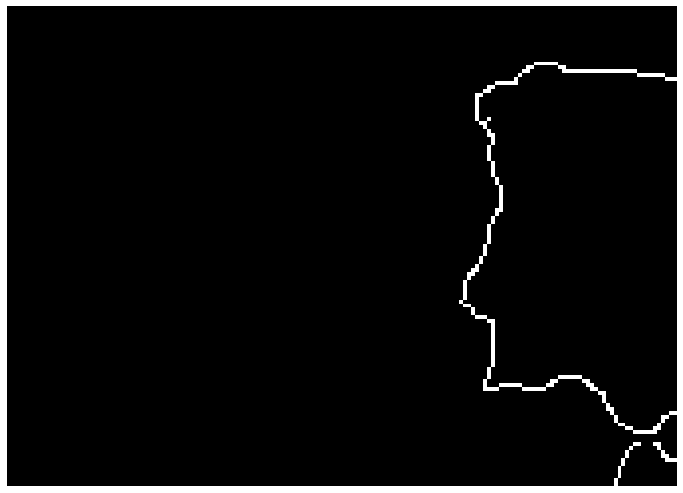

In [165]:
#apply the canny algorithm and plot the image with the edges
canny_costa = cv2.Canny(costa, 0, 1)
plt.imshow(canny_costa, 'gray')    #'gray'-> parametro para por a preto e branco
plt.axis('off');

In [166]:
canny_costa= canny_costa/255

In [167]:
canny = canny - canny_costa

In [170]:
canny = canny*255

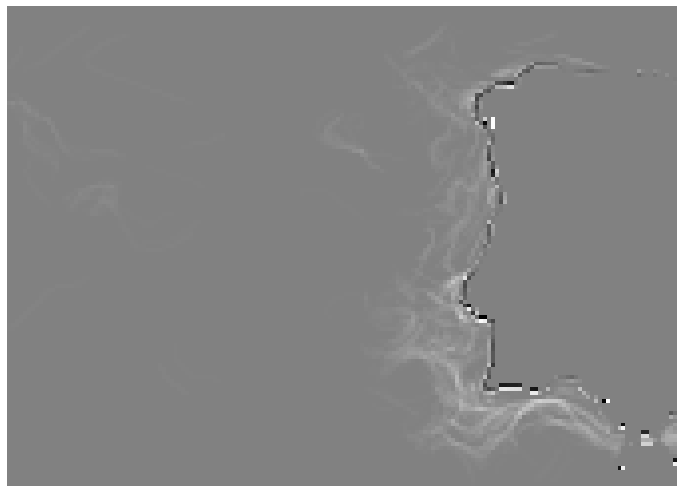

In [171]:
plt.rcParams["figure.figsize"] = 12,12
plt.imshow(canny, 'gray')    #'gray'-> parametro para por a preto e branco
plt.axis('off');